<a href="https://colab.research.google.com/github/MainN/diploma/blob/master/pyro/linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip3 install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl
!pip3 install torchvision
!pip3 install pyro-ppl

ERROR: torch-0.4.0-{platform}-linux_x86_64.whl is not a valid wheel filename.
     |████████████████████████████████| 614kB 4.9MB/s 


In [4]:
import pyro
import os
from functools import partial
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pyro.poutine as poutine
import pyro.distributions as dist
from pyro.infer.mcmc.api import MCMC
from pyro.infer.mcmc.hmc import HMC

Sample: 100%|██████████| 1050/1050 [00:22, 47.30it/s, step size=1.29e-01, acc. prob=0.980]


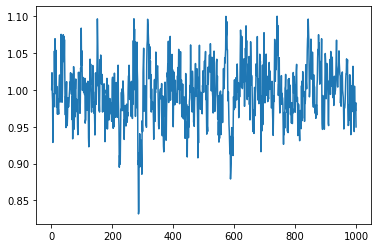

In [5]:
def linear(xes):
    slope = pyro.sample("slope",dist.Normal(5,10))
    intercept = pyro.sample("intercept",dist.Normal(0,10))
    var = pyro.sample("var",dist.InverseGamma(3, 0.1))
    res=slope*xes+intercept
    return pyro.sample("result",dist.MultivariateNormal(res,var*torch.eye(len(xes))))
conditioned_scale = pyro.condition(linear, data={"result": torch.tensor([1,2,3,4,5,6])})
#print(linear(torch.tensor([1,2,3,4,5,6])))
hmc_kernel = HMC(conditioned_scale, step_size=0.9, num_steps=1)
posterior = MCMC(hmc_kernel,
                 num_samples=1000,
                 warmup_steps=50)
posterior.run(torch.tensor([1,2,3,4,5,6]))
samples=posterior.get_samples()
sns.lineplot(x=range(1,1001),y=samples['slope'])

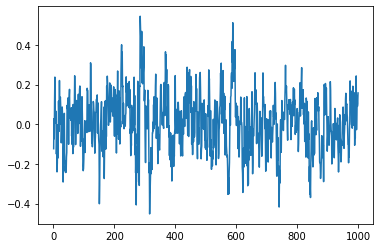

In [6]:
sns.lineplot(x=range(1,1001),y=samples['intercept'])

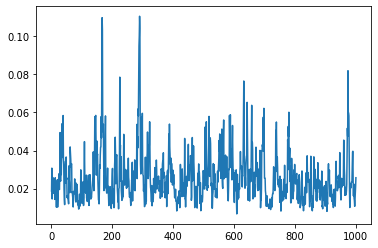

In [7]:
sns.lineplot(x=range(1,1001),y=samples['var'])